### 텍스트 데이터 다루기

#### 1) 단어와 문자의 원-핫 인코딩

In [1]:
# 단어 수준의 원-핫 인코딩하기 (간단한 예)
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
# 초기 데이터: 각 원소가 샘플 (이 예에서 하나의 샘플이 하나의 문장. 하지만 문서 전체가 될 수도 있음)

token_index = {} # 데이터에 있는 모든 토큰의 인덱스를 구축함
for sample in samples:
    for word in sample.split(): # split() 메서드를 사용하여 샘플을 토큰으로 나눔 / 실전에서는 구두점과 특수 문자도 사용함
        if word not in token_index:
            token_index[word] = len(token_index) + 1 # 단어마다 고유한 인덱스를 할당 / 인덱스 0은 사용하지 않음
            
max_length = 10 # 샘플을 벡터로 변환 / 각 샘플에서 max_length까지 단어만 사용

results = np.zeros(shape=(len(samples), max_length, max(token_index.values())+1)) # 결과를 저장할 배열

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i,j,index] = 1.

In [2]:
# 문자 수준의 원-핫 인코딩하기 (간단한 예)
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable # 출력 가능한 모든 아스키(ASCII) 문자
token_index = dict(zip(characters, range(1,len(characters)+1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values())+1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i,j,index] = 1.

In [3]:
# 케라스를 사용한 단어 수준의 원-핫 인코딩하기
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000) # 가장 빈도가 높은 1,000개의 단어만 선택하도록 Tokenizer 객체를 만듦
tokenizer.fit_on_texts(samples) # 단어 인덱스를 구축함

sequences = tokenizer.texts_to_sequences(samples) # 문자열을 정수 인덱스의 리스트로 변환

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
# 직접 원-핫 이진 벡터 표현을 얻을 수 있음 / 원-핫 인코딩 외에 다른 벡터화 방법들도 제공

word_index = tokenizer.word_index # 계산된 단어 인덱스를 구함
print("%s개의 고유한 토큰을 찾았습니다." % len(word_index))

Using TensorFlow backend.
c:\users\rladh\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\rladh\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\rladh\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\rladh\anaconda3\envs\py36\lib\site-packag

9개의 고유한 토큰을 찾았습니다.


In [4]:
# 해싱 기법을 사용한 단어 수준의 원-핫 인코딩하기 (간단한 예)
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimensionality = 1000 # 단어를 크기가 1,000인 벡터로 저장 / 1,000개(또는 그 이상)의 단어가 있다면 해싱 충돌이 늘어나고 인코딩의 정확도가 감소할 것
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality # 단어를 해싱하여 0과 1,000 사이의 랜덤한 정수 인덱스로 변환
        results[i,j,index] = 1.

#### 2) 단어 임베딩 사용하기

In [5]:
# Embedding 층의 객체 생성하기
from keras.layers import Embedding

embedding_layer = Embedding(1000, 64) 
# Embedding 층은 적어도 2개의 매개변수를 받음
# 가능한 토큰의 개수 (여기서는 1,000으로 단어 인덱스 최댓값 + 1) / 임베딩 차원 (여기서는 64)

In [6]:
# Embedding 층에 사용할 IMDB 데이터 로드하기
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000 # 특성으로 사용할 단어의 수
maxlen = 20 # 사용할 텍스트의 길이(가장 빈번한 max_features개의 단어만 사용)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) # 정수 리스트로 데이터를 로드

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen) # 리스트를 (samples, maxlen) 크기의 2D 정수 텐서로 변환
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [7]:
# IMDB 데이터에 Embedding 층과 분류기 사용하기
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
# 나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 Embedding 층에 input_length를 지정
# Embedding 층의 출력 크기는 (samples, maxlen, 8)이 됨
model.add(Embedding(10000, 8, input_length=maxlen))

model.add(Flatten()) # 3D 임베딩 텐서를 (samples, maxlen*8) 크기의 2D 텐서로 펼침

model.add(Dense(1, activation='sigmoid')) # 분류기를 추가
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 82us/step - loss: 0.6775 - acc: 0.6001 - val_loss: 0.6395 - val_acc: 0.6904
Epoch 2/10
20000/20000 [==============================] - 1s 70us/step - loss: 0.5605 - acc: 0.7477

In [25]:
# IMDB 원본 데이터 전처리하기
import os

imdb_dir = 'c:/datasets/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [26]:
# IMDB 원본 데이터의 텍스트를 토큰화하기
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 # 100개 단어 이후는 버림
training_samples = 200 # 훈련 샘플은 200개
validation_samples = 10000 # 검증 샘플은 1만 개
max_words = 10000 # 데이터셋에서 가장 빈도 높은 1만 개의 단어만 사용

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

# 데이터를 훈련 세트와 검증 세트로 분할 / 샘플이 순서대로 있기 때문에 (부정 샘플이 모두 나온 후 긍정 샘플이 옴) 먼저 데이터를 섞음
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = data[:training_samples]
x_val = data[training_samples:training_samples+validation_samples]
y_val = labels[training_samples:training_samples+validation_samples]

88582개의 고유한 토큰을 찾았습니다.
데이터 텐서의 크기: (25000, 100)
레이블 텐서의 크기: (25000,)


In [27]:
# GloVe 단어 임베딩 파일 파싱하기
glove_dir = 'c:/datasets/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('%s개의 단어 벡터를 찾았습니다.' % len(embeddings_index))

400000개의 단어 벡터를 찾았습니다.


In [28]:
# GloVe 단어 임베딩 행렬 준비하기
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector # 임베딩 인덱스에 없는 단어는 모두 0이 됨

In [29]:
# 모델 정의하기
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_5 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [30]:
# 사전 훈련된 단어 임베딩을 Embedding 층에 로드하기
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [31]:
# 훈련과 평가하기
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

model.save_weights('pre_trained_glove_model.h5')

ValueError: Error when checking target: expected dense_9 to have shape (1,) but got array with shape (100,)

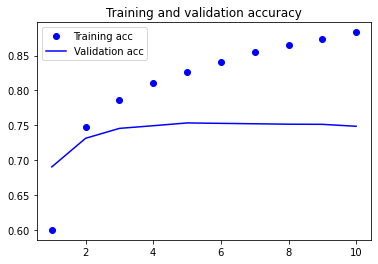

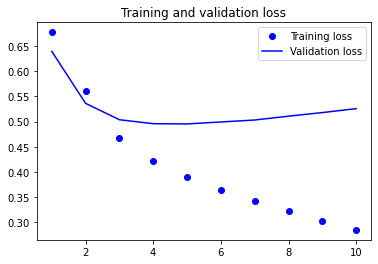

In [22]:
# 결과 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc =history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
# 사전 훈련된 단어 임베딩을 사용하지 않고 같은 모델 훈련하기
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


ValueError: Error when checking target: expected dense_7 to have shape (1,) but got array with shape (100,)

In [24]:
# 테스트 데이터 토큰화하기
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
                
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [ ]:
# 테스트 세트에서 모델 평가하기
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)